Loading Spotify dataset...
Dataset loaded successfully: 114000 rows and 21 columns.

###### DATA PREPROCESSING ######

Missing values in the selected features:
Series([], dtype: int64)
Using the complete dataset with 114000 rows.
Using music genre as the target variable.
Limiting to the 10 most frequent genres: acoustic, afrobeat, alt-rock, alternative, ambient, anime, black-metal, bluegrass, blues, brazil
Encoded target classes: [('acoustic', 0), ('afrobeat', 1), ('alt-rock', 2), ('alternative', 3), ('ambient', 4), ('anime', 5), ('black-metal', 6), ('bluegrass', 7), ('blues', 8), ('brazil', 9)]
Training set: 8000 samples, Test set: 2000 samples

###### KNN MODELING ######

KNN Classification to predict: track_genre


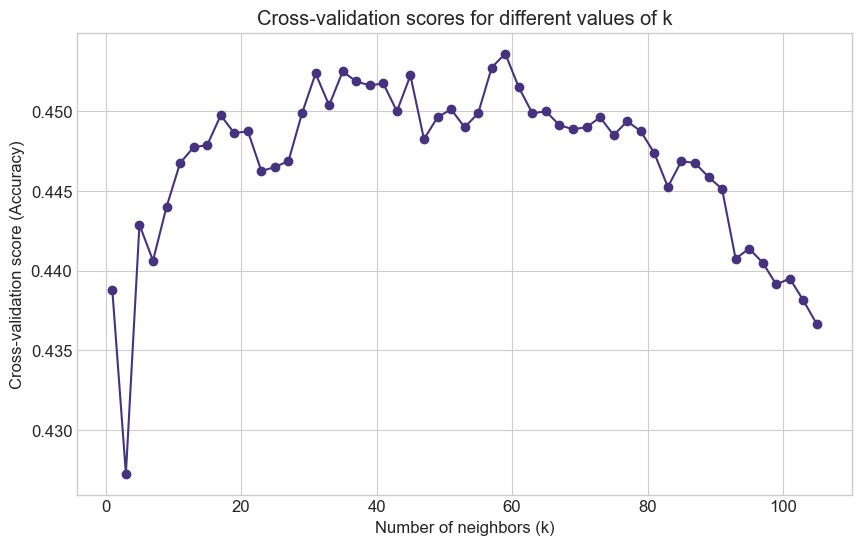

Best value of k: 59 with a cross-validation score of 0.4536
Model accuracy on the test set: 0.4605

Classification report:
              precision    recall  f1-score   support

    acoustic       0.39      0.52      0.45       208
    afrobeat       0.55      0.53      0.54       202
    alt-rock       0.23      0.45      0.31       192
 alternative       0.25      0.16      0.20       201
     ambient       0.78      0.72      0.75       209
       anime       0.34      0.20      0.25       186
 black-metal       0.75      0.78      0.76       211
   bluegrass       0.48      0.49      0.49       204
       blues       0.46      0.20      0.28       212
      brazil       0.45      0.52      0.48       175

    accuracy                           0.46      2000
   macro avg       0.47      0.46      0.45      2000
weighted avg       0.47      0.46      0.45      2000



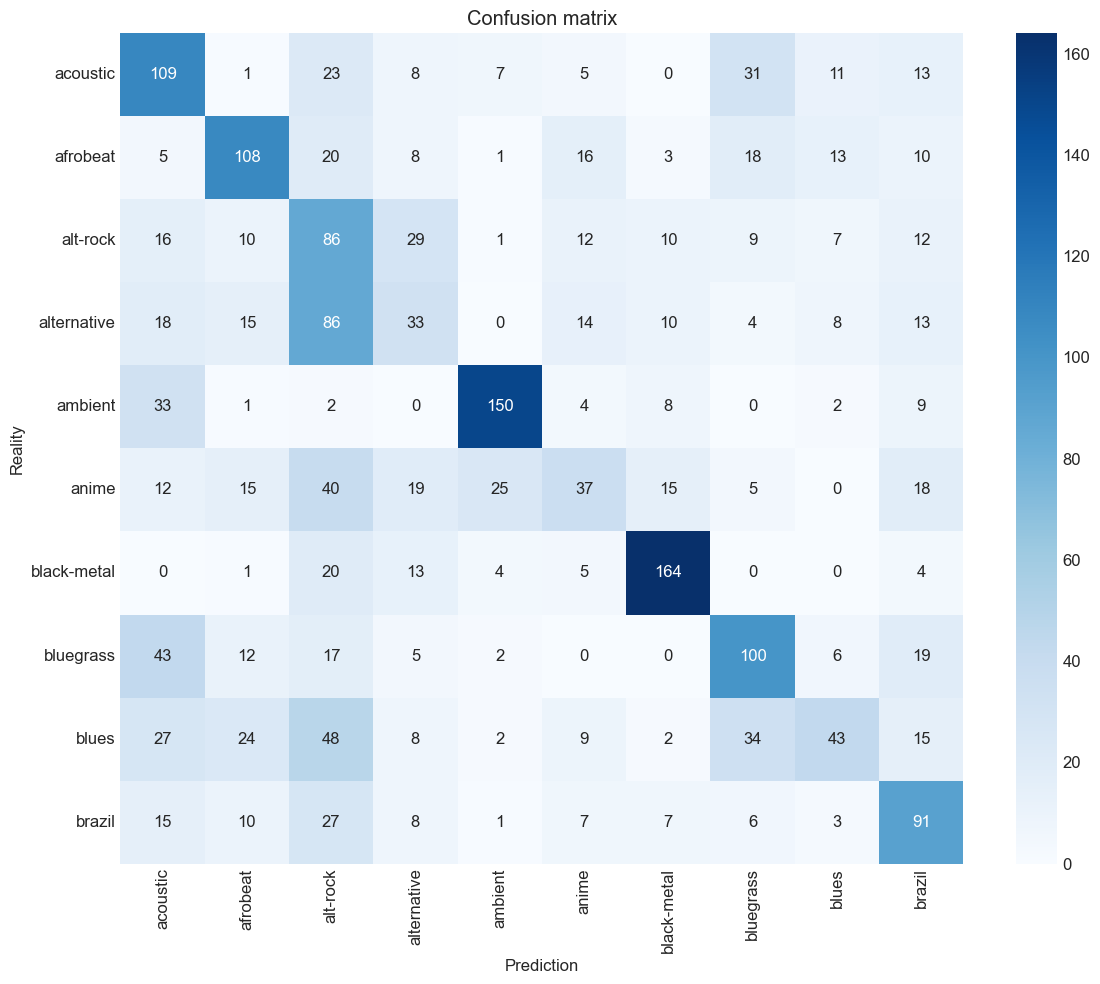

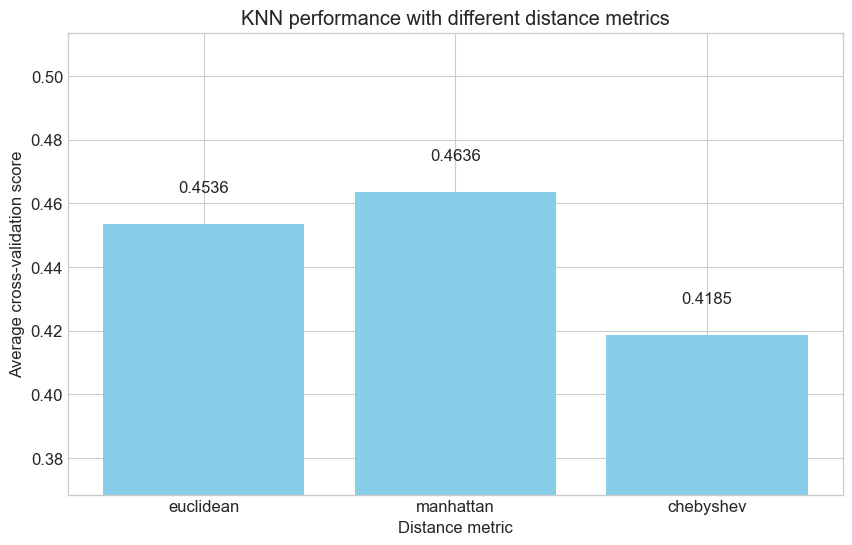


KNN regression model to predict popularity


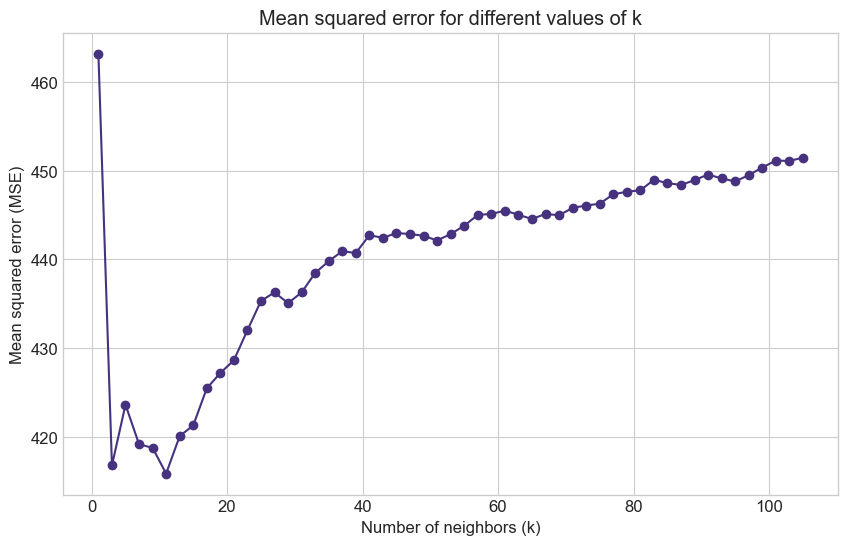

Best value of k for regression: 11 with MSE of 415.8460
MSE: 415.8460
RMSE: 20.3923
R²: 0.1508


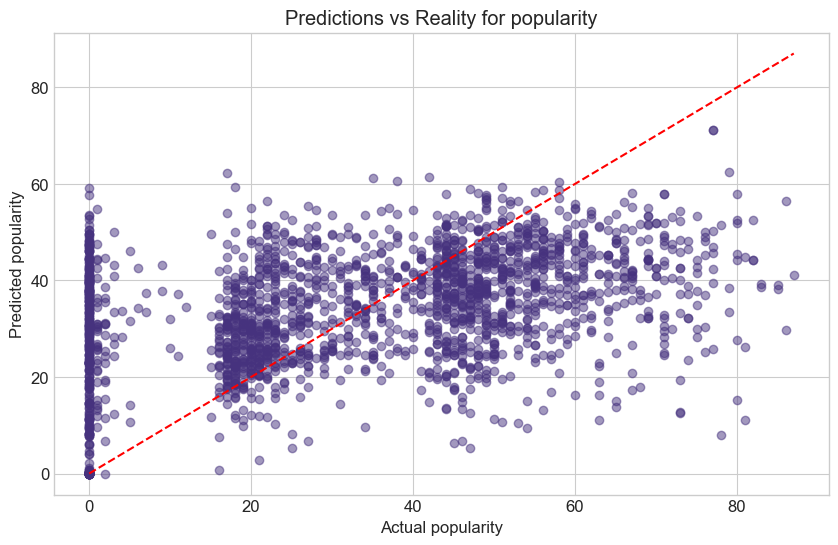

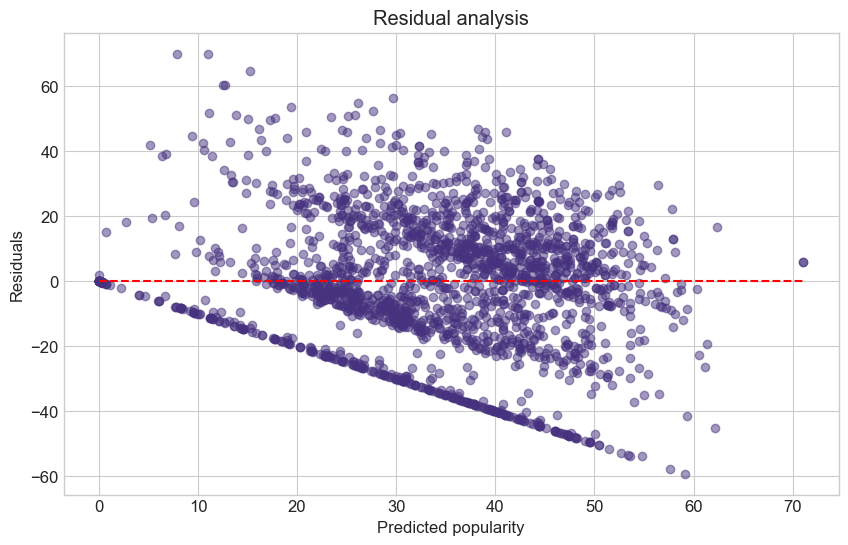


KNN modeling completed successfully.


In [ ]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# graphics display configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# assuming df is already loaded from part 1
try:
    # check if df already exists
    df.head()
    print("Using the already loaded dataset.")
except:
    print("Loading Spotify dataset...")
    # URL to download the dataset
    spotify_dataset_url = r"archive\dataset.csv"
    
    # loading the dataset
    try:
        df = pd.read_csv(spotify_dataset_url)
        print(f"Dataset loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns.")
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        
print("\n###### DATA PREPROCESSING ######")

# selection of relevant features for modeling
numeric_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                   'time_signature', 'duration_ms']

# checking for missing values in the selected features
missing_in_features = df[numeric_features].isnull().sum()
print("\nMissing values in the selected features:")
print(missing_in_features[missing_in_features > 0])

# handling missing values if necessary
if missing_in_features.sum() > 0:
    print("Replacing missing values...")
    df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

df_sample = df.copy()
print(f"Using the complete dataset with {df_sample.shape[0]} rows.")


# using genre as the target for classification
print("Using music genre as the target variable.")
# limiting the number of genres to the 10 most frequent to simplify classification
top_genres = df_sample['track_genre'].value_counts().nlargest(10).index
df_sample = df_sample[df_sample['track_genre'].isin(top_genres)]
print(f"Limiting to the {len(top_genres)} most frequent genres: {', '.join(top_genres)}")
target = 'track_genre'
task = 'classification'

# defining features and target
X = df_sample[numeric_features]
if task == 'classification':
    le = LabelEncoder()
    y = le.fit_transform(df_sample[target])
    class_names = le.classes_
    print(f"Encoded target classes: {list(zip(le.classes_, range(len(le.classes_))))}")
else:
    y = df_sample[target]

# splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")

# data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n###### KNN MODELING ######")

# TASK: classification of music genres
if task == 'classification':
    print("\nKNN Classification to predict:", target)
    
    # finding the optimal value of k with cross-validation
    k_range = range(1, 107, 2)
    cv_scores = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    # plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, cv_scores, marker='o', linestyle='-')
    plt.title('Cross-validation scores for different values of k')
    plt.xlabel('Number of neighbors (k)')
    plt.ylabel('Cross-validation score (Accuracy)')
    plt.grid(True)
    plt.savefig('knn_cv_scores.png')
    plt.show()
    plt.close()
    
    # best value of k
    best_k = k_range[np.argmax(cv_scores)]
    print(f"Best value of k: {best_k} with a cross-validation score of {max(cv_scores):.4f}")
    
    # training the model with the best value of k
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train_scaled, y_train)
    
    # evaluating the model
    y_pred = knn_best.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy on the test set: {accuracy:.4f}")
    
    # classification report
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=class_names if task == 'classification' else None))
    
    # confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion matrix')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()
    plt.close()
    
    # Testing with different distances
    distances = ['euclidean', 'manhattan', 'chebyshev']
    distance_scores = []
    
    for distance in distances:
        knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
        distance_scores.append(scores.mean())
    
    plt.figure(figsize=(10, 6))
    plt.bar(distances, distance_scores, color='skyblue')
    plt.title('KNN performance with different distance metrics')
    plt.xlabel('Distance metric')
    plt.ylabel('Average cross-validation score')
    plt.ylim(min(distance_scores) - 0.05, max(distance_scores) + 0.05)
    for i, score in enumerate(distance_scores):
        plt.text(i, score + 0.01, f"{score:.4f}", ha='center')
    plt.savefig('distance_metrics_comparison.png')
    plt.show()
    plt.close()
    
# ALTERNATIVE TASK: regression to predict popularity
print("\nKNN regression model to predict popularity")

# preparing data for regression
X_reg = df_sample[numeric_features]
y_reg = df_sample['popularity']

# splitting into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# normalization
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# finding the best value of k for regression
k_range = range(1, 107, 2)
mse_scores = []

for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg_scaled, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg_scaled)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_scores.append(mse)

# plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_scores, marker='o', linestyle='-')
plt.title('Mean squared error for different values of k')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Mean squared error (MSE)')
plt.grid(True)
plt.savefig('knn_regression_mse.png')
plt.show()
plt.close()

# best value of k for regression
best_k_reg = k_range[np.argmin(mse_scores)]
print(f"Best value of k for regression: {best_k_reg} with MSE of {min(mse_scores):.4f}")

# training the model with the best value of k
knn_reg_best = KNeighborsRegressor(n_neighbors=best_k_reg)
knn_reg_best.fit(X_train_reg_scaled, y_train_reg)

# evaluating the regression model
y_pred_reg = knn_reg_best.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# visualization of predictions vs reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')
plt.title('Predictions vs Reality for popularity')
plt.xlabel('Actual popularity')
plt.ylabel('Predicted popularity')
plt.grid(True)
plt.savefig('regression_predictions.png')
plt.show()
plt.close()

# residual analysis
residuals = y_test_reg - y_pred_reg

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_reg), xmax=max(y_pred_reg), colors='r', linestyles='--')
plt.title('Residual analysis')
plt.xlabel('Predicted popularity')
plt.ylabel('Residuals')
plt.grid(True)
plt.savefig('residuals_analysis.png')
plt.show()
plt.close()

print("\nKNN modeling completed successfully.")